# Setting dtreeviz element colors

The dtreeviz library uses colorblind-friendly pastel colors by default, but these might not look great when projected or you might simply want to display colors differently.

To jump right into the examples use this Colab notebook link:

https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/colors.ipynb

If you look in [colors.py](https://github.com/parrt/dtreeviz/blob/master/dtreeviz/colors.py), you will see the default colors:

```
color_blind_friendly_colors = [
    None,  # 0 classes
    None,  # 1 class
    ['#FEFEBB', '#a1dab4'],  # 2 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4'],  # 3 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4', LIGHTORANGE],  # 4
    ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', LIGHTORANGE],  # 5
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', LIGHTORANGE, '#f46d43'],  # 6
    ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'],  # 7
    ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'],  # 8
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43'],  # 9
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43', '#d73027']  # 10
]
```

You can change many of the elements of the visualized trees using one of the dictionary names in `COLORS`:

```
COLORS = {'scatter_edge': GREY,
          'scatter_marker': BLUE,
          'scatter_marker_alpha': 0.7,
          'class_boundary' : GREY,
          'warning' : '#E9130D',
          'tile_alpha':0.8,            # square tiling in decision_boundaries to show probabilities
          'tesselation_alpha': 0.3,    # rectangular regions for decision tree feature space partitioning
          'tesselation_alpha_3D': 0.5,
          'split_line': GREY,
          'mean_line': '#f46d43',
          'axis_label': GREY,
          'title': GREY,
          'legend_title': GREY,
          'legend_edge': GREY,
          'edge': GREY,
          'color_map_min': '#c7e9b4',
          'color_map_max': '#081d58',
          'classes': color_blind_friendly_colors,
          'rect_edge': GREY,
          'text': GREY,
          'highlight': HIGHLIGHT_COLOR,
          'wedge': WEDGE_COLOR,
          'text_wedge': WEDGE_COLOR,
          'arrow': GREY,
          'node_label': GREY,
          'tick_label': GREY,
          'leaf_label': GREY,
          'pie': GREY,
          'hist_bar': LIGHTBLUE,
          'categorical_split_left': CATEGORICAL_SPLIT_LEFT,
          'categorical_split_right': CATEGORICAL_SPLIT_RIGHT
          }
```

The idea is that you will pass in a `colors` dictionary as an argument to the various library functions.
 
Using the Iris classification data set, here's how to play with the colors for a classifier partitioning.

In [65]:
import dtreeviz.trees
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from IPython.display import SVG, display

%config InlineBackend.figure_format = 'svg'

In [6]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [26]:
def show_iris(colors=None):
    iris = load_iris()
    X = iris.data
    X = X[:,2].reshape(-1,1) # petal length (cm)
    y = iris.target
    len(X), len(y)

    feature_c_univar = "petal length (cm)"
    target_c_univar = "iris"
    class_names_univar = list(iris.target_names)
    
    dtc_univar = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
    dtc_univar.fit(X, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(6,2))
    m = dtreeviz.model(dtc_univar, X, y,
                       feature_names=[feature_c_univar],
                       target_name=target_c_univar,
                       class_names=class_names_univar)
    m.ctree_feature_space( 
                nbins=40, gtype='strip',
                show={'splits','title'},
                colors=colors, ax=ax)

Here's what the default partitioning looks like:

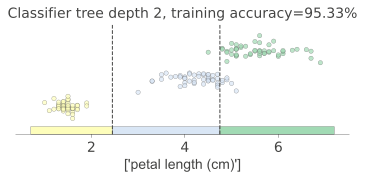

In [27]:
show_iris()

 Let's change the dashed lines to orange and the thin border of the scatter points to blue:

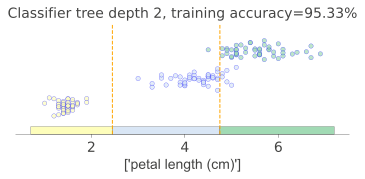

In [28]:
show_iris(colors={'scatter_edge': 'blue', 'split_line':'orange'})

Let's look at the decision tree plot:

In [31]:
def show_iris_dtree(colors=None):
    clas = tree.DecisionTreeClassifier(max_depth=2)  
    iris = load_iris()
    X_train = iris.data
    y_train = iris.target
    clas.fit(X_train, y_train)

    m = dtreeviz.model(clas, X_train, y_train,
                   feature_names=iris.feature_names,
                   target_name='price',
                   class_names=["setosa", "versicolor", "virginica"])
    return m.view(histtype= 'barstacked',  # barstacked is default
                  colors=colors)

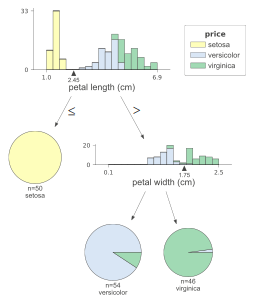

In [32]:
show_iris_dtree()

Now, let's change some colors:

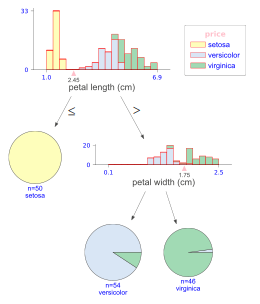

In [33]:
show_iris_dtree(colors={'legend_title':'pink',
                        'rect_edge':'red',
                        'text':'blue',
                        'wedge':'pink',
                        'tick_label':'blue'})

To change the class colors themselves, we have to pass in a color for each class.

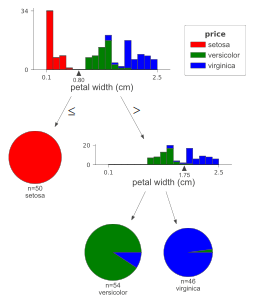

In [34]:
colors_for_up_to_3_classes = [None,  # 0 classes
                              None,  # 1 class
                              None,  # 2 classes
                              ['red','green','blue'] # 3 classes
                              ]
show_iris_dtree(colors={'classes':colors_for_up_to_3_classes})

## Big examples demoing all of the various color elements

In [43]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
data_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'data'))
img_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'samples'))

In [44]:
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_diabetes
import dtreeviz.trees
import IPython.display
from IPython.core.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [45]:
def save_viz_locally(viz, change):
    if change is None:
        change = {'None': None}
    image_name = 'colors_{}.svg'.format('_'.join(list(change.keys())))
    filename = os.path.join(img_folder, image_name)
    viz.save(filename)
    filename = os.path.join('..', 'testing', 'samples', image_name)
    return filename

In [46]:
RED = '#ff0000'

In [75]:
#data for classifier
classifier = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()
classifier.fit(iris.data, iris.target)

#date for regressor
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

#data for bivar_3D
df_cars = pd.read_csv(os.path.join(data_folder, 'cars.csv'))
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = [2, 1]
X = X.values[:,features]

def change_classifier(colors):
    viz_model = dtreeviz.model(classifier,
                              iris.data,
                              iris.target,
                              target_name='variety',
                              feature_names=iris.feature_names,
                              class_names=["setosa", "versicolor", "virginica"])
    return viz_model.view(colors=colors)


def change_regression(colors):
    viz_model = dtreeviz.model(regr,
                              boston.data,
                              boston.target,
                              target_name='price',
                              feature_names=boston.feature_names)
    return viz_model.view(colors=colors)

def change_heatmap(colors):
    features_reg_heatmap = ["WGT", "ENG"]
    target_reg_heatmap = "MPG"
    dtr_heatmap = DecisionTreeRegressor(max_depth=4, criterion="absolute_error")
    dtr_heatmap.fit(X, y)
    
    viz_model = dtreeviz.model(dtr_heatmap, X, y,
                           feature_names=features_reg_heatmap, 
                           target_name=target_reg_heatmap)
    return viz_model.view(
        # TODO: fontsize=14,
                           colors=colors
    # TODO:                       ax=ax
    )

/Users/parrt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

unchanged
all changes
{'tick_label': '#ff0000'}


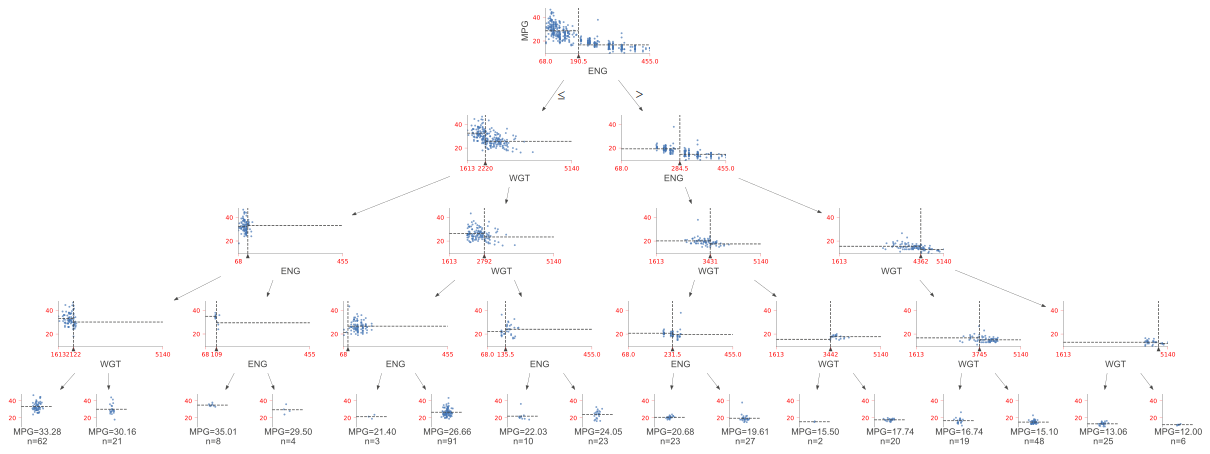

{'title': '#ff0000'}


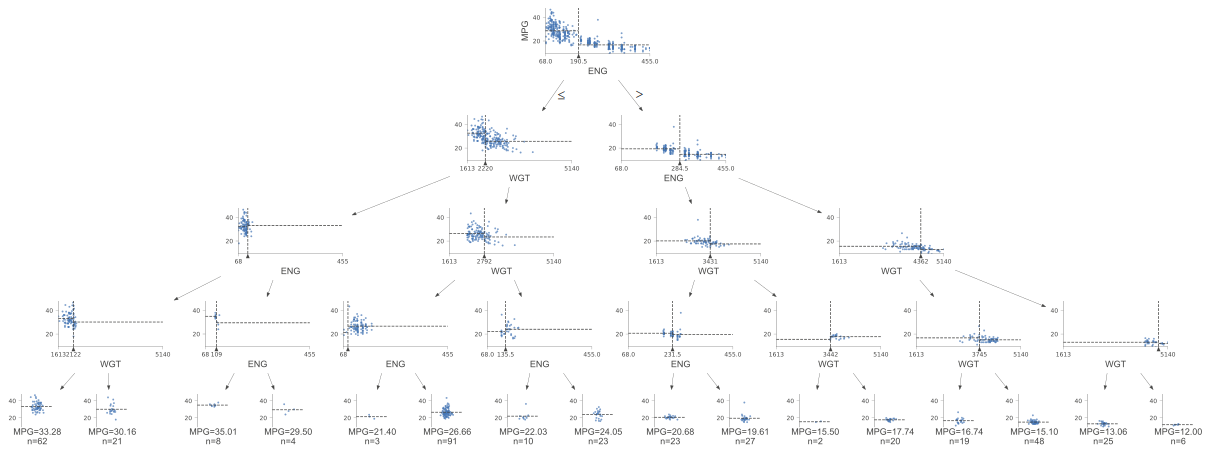

{'axis_label': '#ff0000'}


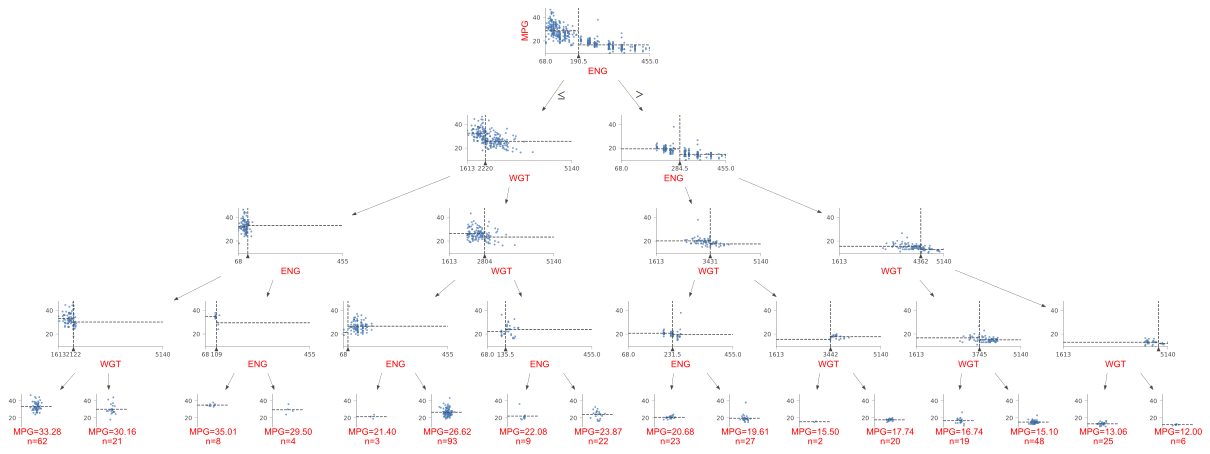

{'color_map_min': '#ffffff'}


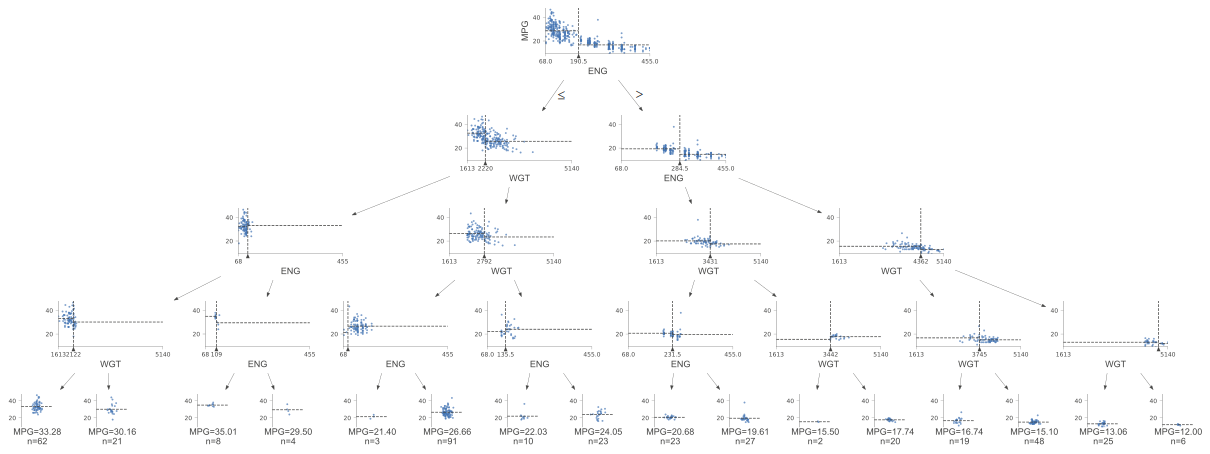

{'color_map_max': '#ff0000'}


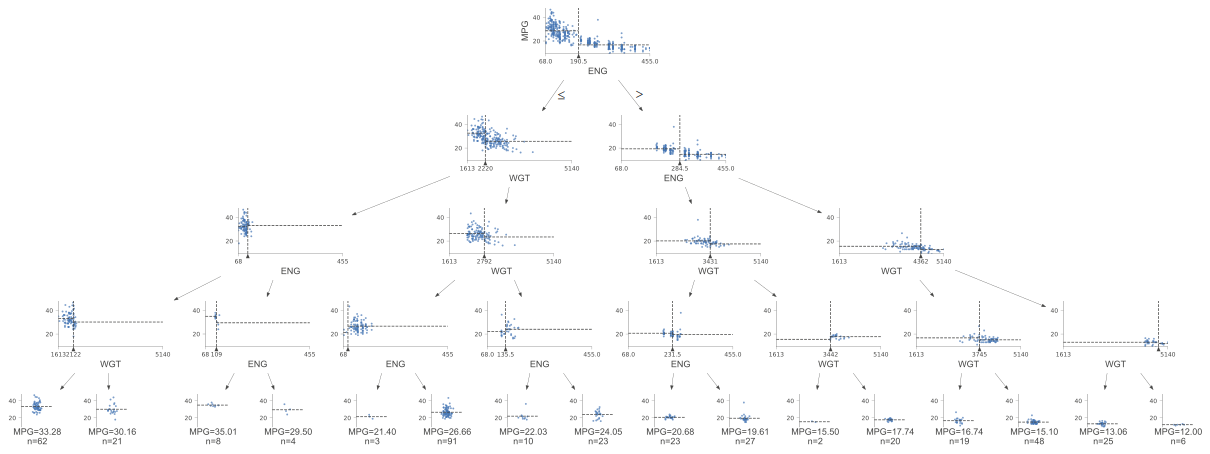

{'edge': '#ff0000'}


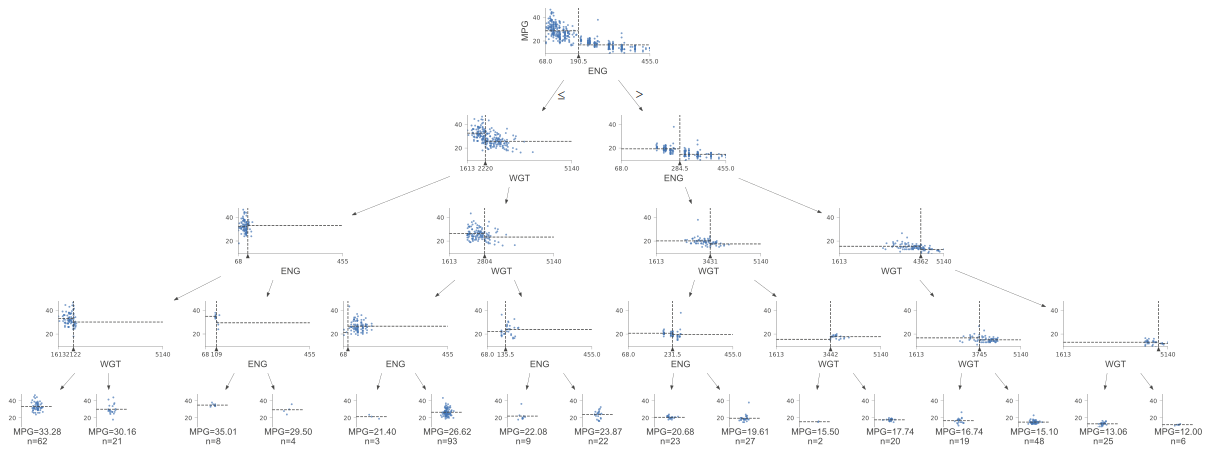

{'scatter_edge': '#0000ff'}


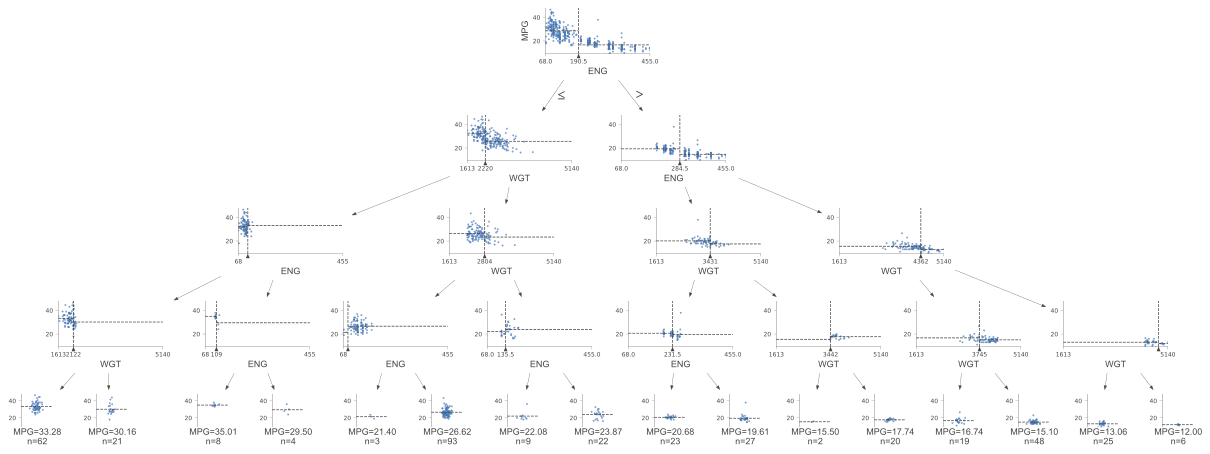

In [76]:
    
changes = [{'tick_label': RED}, {'title': RED}, {'axis_label': RED},
           {'color_map_min': '#ffffff'}, {'color_map_max': RED}, {'edge': RED}, {'scatter_edge': '#0000ff'}]

print('unchanged')
change_heatmap(None)

print('all changes')
change_heatmap({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    display(SVG(change_heatmap(change).svg()))

unchanged
all changes
{'scatter_edge': '#ff0000'}
{'tick_label': '#ff0000'}
{'axis_label': '#ff0000'}
{'edge': '#ff0000'}
{'color_map_min': '#ff0000'}
{'color_map_max': '#ff0000'}
{'color_map_min': '#ffff00', 'color_map_max': '#ff0000'}


<Figure size 600x500 with 0 Axes>

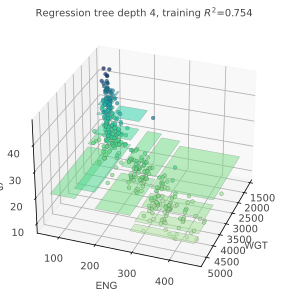

<Figure size 600x500 with 0 Axes>

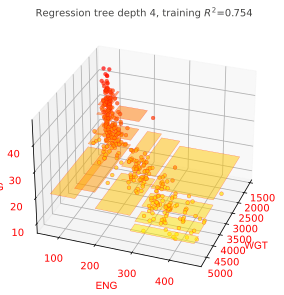

<Figure size 600x500 with 0 Axes>

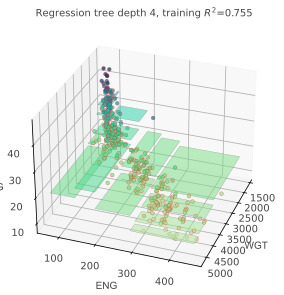

<Figure size 600x500 with 0 Axes>

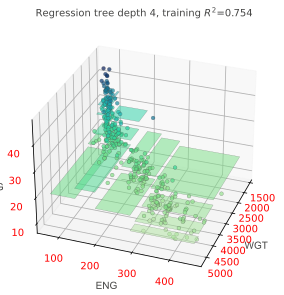

<Figure size 600x500 with 0 Axes>

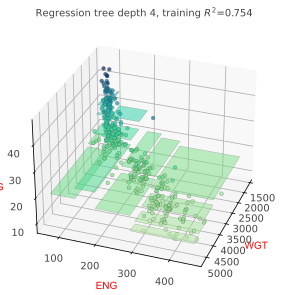

<Figure size 600x500 with 0 Axes>

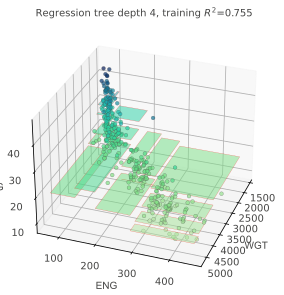

<Figure size 600x500 with 0 Axes>

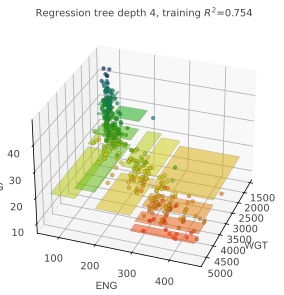

<Figure size 600x500 with 0 Axes>

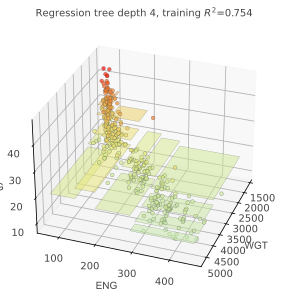

<Figure size 600x500 with 0 Axes>

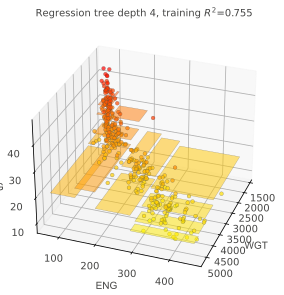

In [72]:
changes = [{'scatter_edge': RED}, {'tick_label': RED}, {'axis_label': '#ff0000'},
           {'edge': '#ff0000'},
           {'color_map_min': RED}, {'color_map_max': RED}, {'color_map_min': '#ffff00', 'color_map_max': RED}]

def change_rtreeviz_bivar_3D(colors):
    features_bivar_3D = ["WGT", "ENG"]
    target_bivar_3D = "MPG"
    bivar_3D = DecisionTreeRegressor(max_depth=4, criterion="absolute_error")
    bivar_3D.fit(X, y)

    fig = plt.figure(figsize=(6,5))
    viz_rmodel = dtreeviz.model(bivar_3D, X, y,
                               feature_names=["WGT", "ENG"],
                               target_name='MPG')
    return viz_rmodel.rtree_feature_space3D(
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors=colors)

print('unchanged')
change_rtreeviz_bivar_3D(None)

print('all changes')
change_rtreeviz_bivar_3D({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_rtreeviz_bivar_3D(change)


In [77]:
%config InlineBackend.figure_format = 'png'
changes = {'no changes': None,
           'wedge': {'wedge': RED},
           'split line': {'split_line': RED},
           'markers': {'scatter_marker': RED},
           'split_prev': {'scatter_marker': RED},
           'axis_label': {'axis_label': RED},
           'title': {'title': RED},
           'classes': {'classes':  [
                        None, # 0 classes
                        None, # 1 class
                       ["#FEFEBB","#a1dab4"], # 2 classes
                       ["#ff0000","#00ff00",'#0000ff'], # colors were changed here
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#fee090'], # 4
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                       ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                       ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]},
           'rect_edge': {'rect_edge': RED},
           'text': {'text': RED},
           'text_wedge': {'text_wedge': RED},
           'arrow': {'arrow': '#ff0000'},
           'tick_label': {'tick_label': RED},
           'legend_edge': {'legend_edge': RED},
           'pie': {'pie': RED},
           }

regression_changes = ['no changes', 'wedge', 'split line', 'markers', 'axis_label',
                      'arrow', 'tick_label']
classifier_changes = ['no changes', 'wedge', 'text_wedge', 'classes', 'title', 'text', 
                      'rect_edge', 'pie']

html = []

for f, relevant_changes in zip((change_regression, change_classifier),
                               (regression_changes, classifier_changes)):
    for change in relevant_changes:
        viz = f(changes[change])
        filename = save_viz_locally(viz, changes[change]).replace('\\', '/')
        html.append(f'<div>{change}<img src="{filename}?sanitize=True)"/></div>')
        
# TODO: not sure why images don't display. They look ok on disk
IPython.display.HTML('<hr>'.join(html))

In [96]:
X_train, y_train = df_cars.drop('MPG', axis=1), df_cars['MPG']

def change_rtree(colors):
    features_univar = ["WGT"]
    target_univar = "MPG"
    dtr_univar = DecisionTreeRegressor(max_depth=2, criterion="absolute_error")
    dtr_univar.fit(X_train[features_univar].values, y_train.values)

    m = dtreeviz.model(dtr_univar, X_train[features_univar], y_train,
                       feature_names=features_univar,
                       target_name=target_univar)
    m.rtree_feature_space(fontsize=14, colors=colors)

No changes
all changes
scatter_marker #00ff00
scatter_edge #ff0000
mean_line #000000
split_line #ff0000
axis_title #ff0000
tick_label #ff0000
axis_label #ff0000
title #ff0000


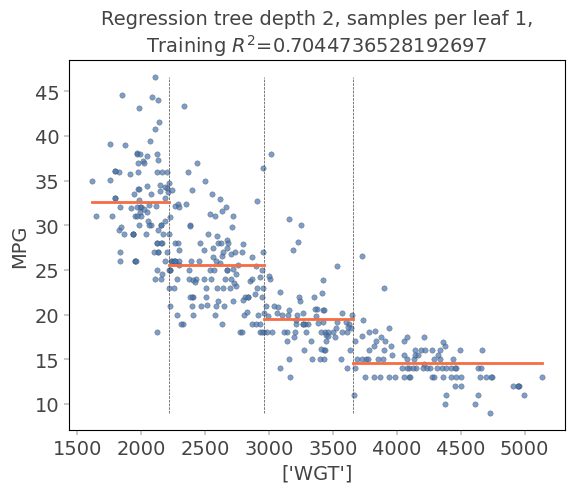

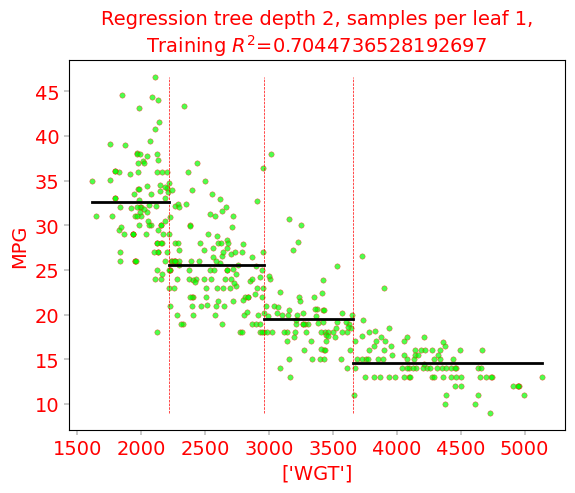

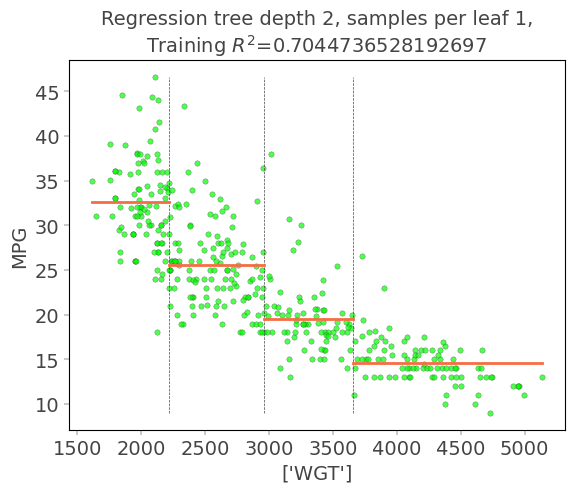

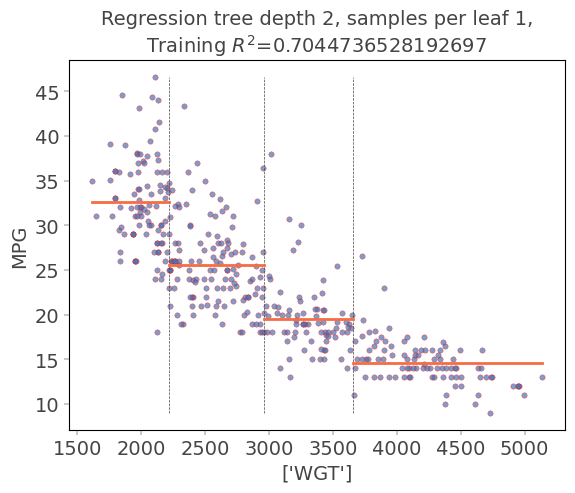

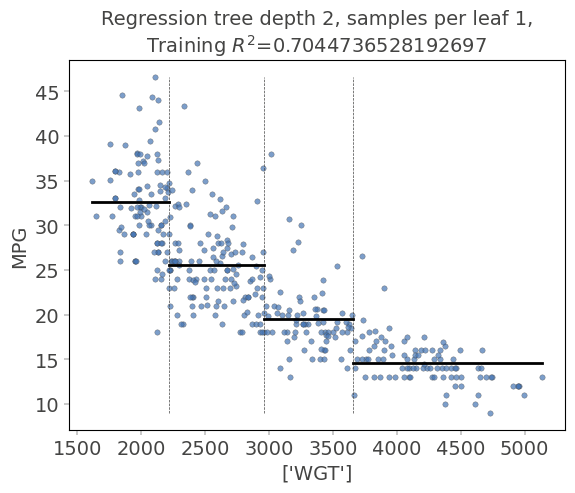

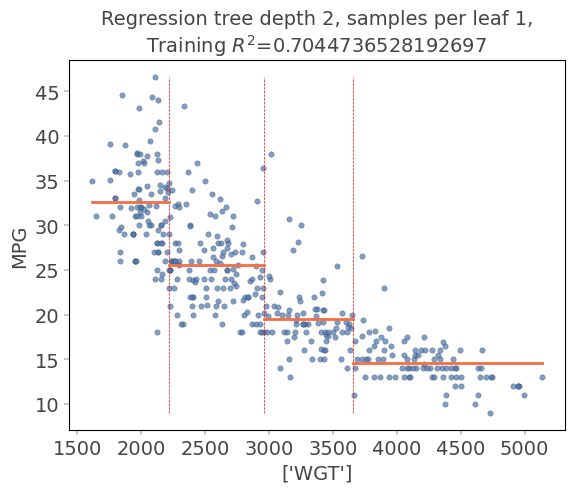

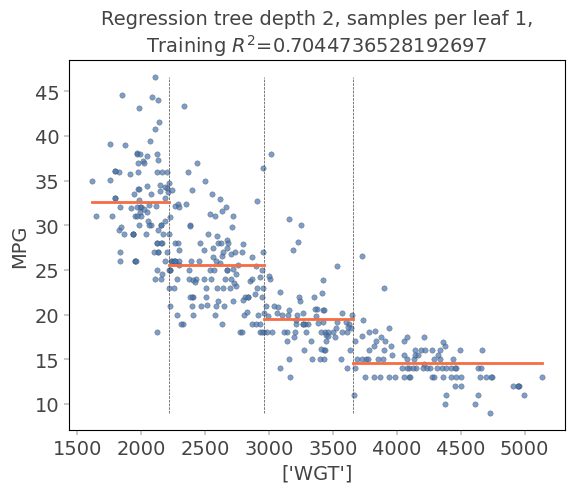

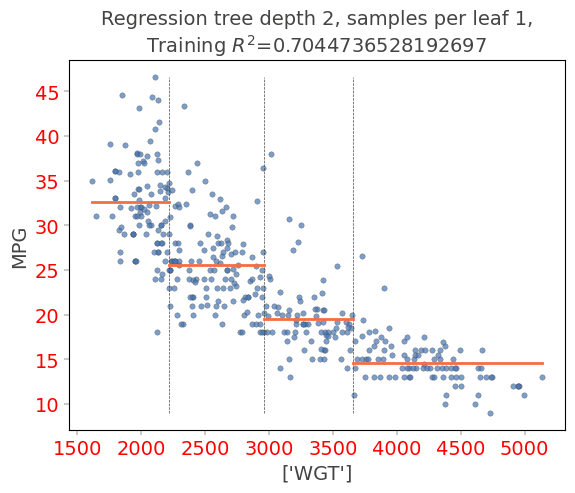

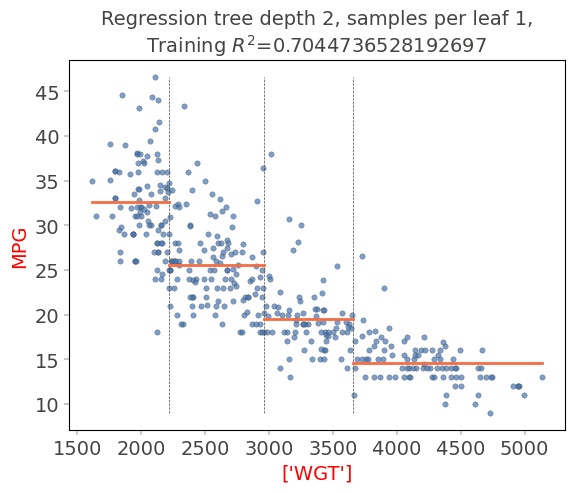

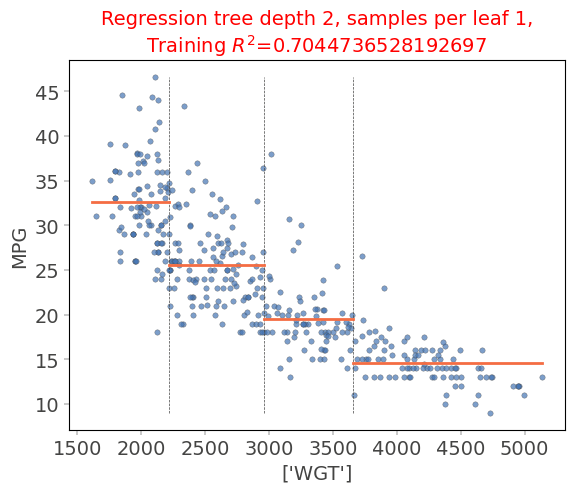

In [97]:
changes = {'scatter_marker': '#00ff00', 'scatter_edge': '#ff0000', 'mean_line': '#000000',
           'split_line': '#ff0000', 'axis_title': '#ff0000', 'tick_label': '#ff0000', 'axis_label': '#ff0000',
           'title': '#ff0000'}

print('No changes')
change_rtree(None)
print('all changes')
change_rtree(changes)
for k, v in changes.items():
    print(k, v)
    change_rtree({k: v})

In [103]:
know = pd.read_csv(os.path.join(data_folder, 'knowledge.csv'))
feature_univar = ["PEG"]
target_univar = "UNS"
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

x_train = know[feature_univar]
y_train = know[target_univar]
dtc_univar = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
dtc_univar.fit(x_train.values, y_train.values)


def change_ctreeviz_univar(colors):
    viz_model = dtreeviz.model(dtc_univar, x_train, y_train, 
                                  feature_names=feature_univar, target_name=target_univar, 
                                  class_names=class_names)
    viz_model.ctree_feature_space(nbins=40, gtype='strip',
                                  show={'splits','title'},
                                  colors=colors,
#                                 figsize=(2,1)   # TODO: can't specify size?
                                 )


print('no changes')
change_ctreeviz_univar(None)

changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'edge': RED},
           {'scatter_edge': RED}, {'split_line': RED},
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('all changes')
change_ctreeviz_univar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_univar(change)

no changes


TypeError: ctree_feature_space() got an unexpected keyword argument 'figsize'

In [102]:
features=[4,3]
X_train = know.drop('UNS', axis=1)
y_train = know['UNS']
X_train = X_train.values[:, features]

dtc_bivar = DecisionTreeClassifier(max_depth=3)
dtc_bivar.fit(X_train, y_train)

def change_ctreeviz_bivar(colors):
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    dtreeviz.trees.ctreeviz_bivar(dtc_bivar, X_train, y_train, 
                                 feature_names=['PEG','LPR'], target_name="Knowledge", 
                                 class_names=class_names,
                                 colors=colors,
                                 ax=ax)
    plt.tight_layout()
    plt.show()

In [ ]:
changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'rect_edge': RED},
           {'legend_edge': 'RED'}, {'legend_title': 'RED'},
           {'scatter_edge': RED}, 
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('no changes')
change_ctreeviz_bivar(None)

print('all changes')
change_ctreeviz_bivar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_bivar(change)

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

def change_dtreeviz(colors):
    return dtreeviz.trees.dtreeviz(regr,
                                   diabetes.data, 
                                   diabetes.target, 
                                   target_name='value', 
                                   orientation ='LR',  # left-right orientation
                                   feature_names=diabetes.feature_names,
                                   X=X,  # need to give single observation for prediction
                                   colors=colors)           


In [ ]:
change_dtreeviz({'highlight': RED})

In [ ]:
change_dtreeviz({'text': RED})

In [ ]:
change_dtreeviz({'leaf_label': RED})

In [ ]:
change_dtreeviz({'arrow': RED})